In [55]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import sympy as sp

In [56]:
def lennard_jones(r, eps=1, sigma=1, equilibrium=False):
    r_cutoff = 2.5 * sigma
    if r == 0 or r > r_cutoff:
        return 0
    if equilibrium:
        r = 1.122 * sigma
    return 4 * eps * ((sigma/r)**12 - (sigma/r)**6)

def force(r):
    V = lennard_jones(r)
    return sp.diff(V, r)

def create_square_lattice(n, spacing):
    atoms = []
    for i in range(n):
        for j in range(n):
            atoms.append((i * spacing, j * spacing))
    return np.array(atoms)

def create_hexagonal_lattice(n, spacing):
    atoms = []
    for i in range(n):
        for j in range(n):
            x = i * spacing + (j % 2) * spacing / 2       # spacing if same even row, else /2 if odd
            y = j * spacing * np.sqrt(3) / 2              # vertical spacing based on geometry (* sin(60))
            atoms.append((x, y))
    return np.array(atoms)

In [57]:
def compute_total_energy(atoms):
    energy = 0
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            r = np.linalg.norm(atoms[i] - atoms[j])
            energy += lennard_jones(r)
    return energy

def compute_local_energy(atoms):
    energies = np.zeros(len(atoms))
    for i in range(len(atoms)):
        for j in range(len(atoms)):
            if i != j:
                r = np.linalg.norm(atoms[i] - atoms[j])
                energies[i] += lennard_jones(r)
    return energies

1.1020408163265305
1.1122448979591837


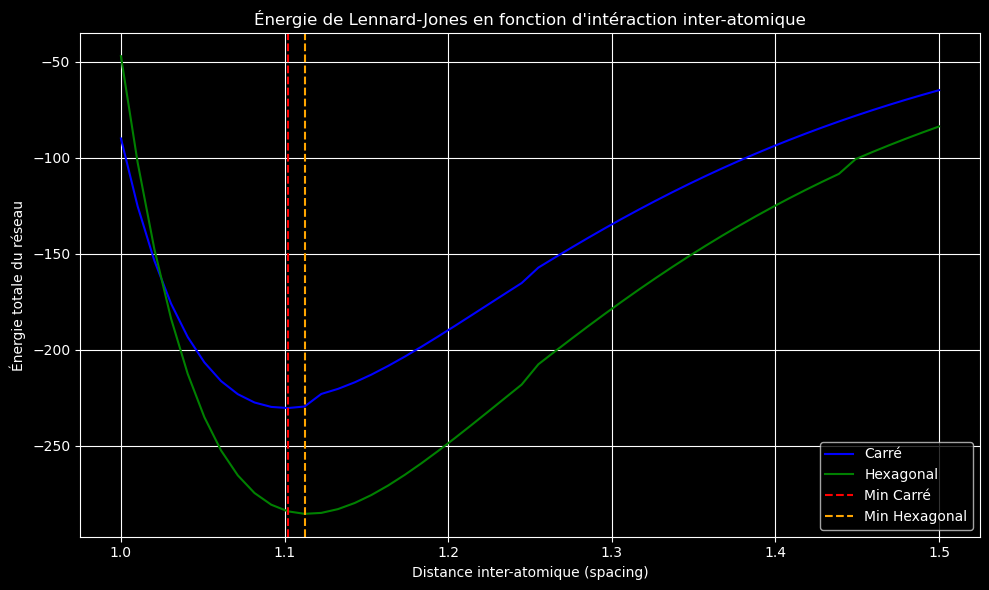

In [58]:
# Parameters
n = 10
spacing = 0.8      # distance entre atomes

# Analyse énergétique en fonction du spacing
spacings = np.linspace(n/10, 1.5)
square_energies = []
hex_energies = []

for s in spacings:
    square_atoms = create_square_lattice(n, s)
    hex_atoms = create_hexagonal_lattice(n, s)
    square_energies.append(compute_total_energy(square_atoms))
    hex_energies.append(compute_total_energy(hex_atoms))
    
# Énergies
square_energy = compute_total_energy(square_atoms)
hex_energy = compute_total_energy(hex_atoms)

square_local = compute_local_energy(square_atoms)
hex_local = compute_local_energy(hex_atoms) 
    
square_min_spacing = spacings[np.argmin(square_energies)]
hex_min_spacing = spacings[np.argmin(hex_energies)]
print(square_min_spacing)
print(hex_min_spacing)

# Tracé de l'énergie en fonction du spacing
plt.figure(figsize=(10, 6))
plt.plot(spacings, square_energies, label="Carré", color="blue")
plt.plot(spacings, hex_energies, label="Hexagonal", color="green")
plt.axvline(square_min_spacing, color="red", linestyle="--", label="Min Carré")
plt.axvline(hex_min_spacing, color="orange", linestyle="--", label="Min Hexagonal")
plt.xlabel("Distance inter-atomique (spacing)")
plt.ylabel("Énergie totale du réseau")
plt.title("Énergie de Lennard-Jones en fonction d'intéraction inter-atomique")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Rayon d'équilibre est égal à $2^{1/6}$

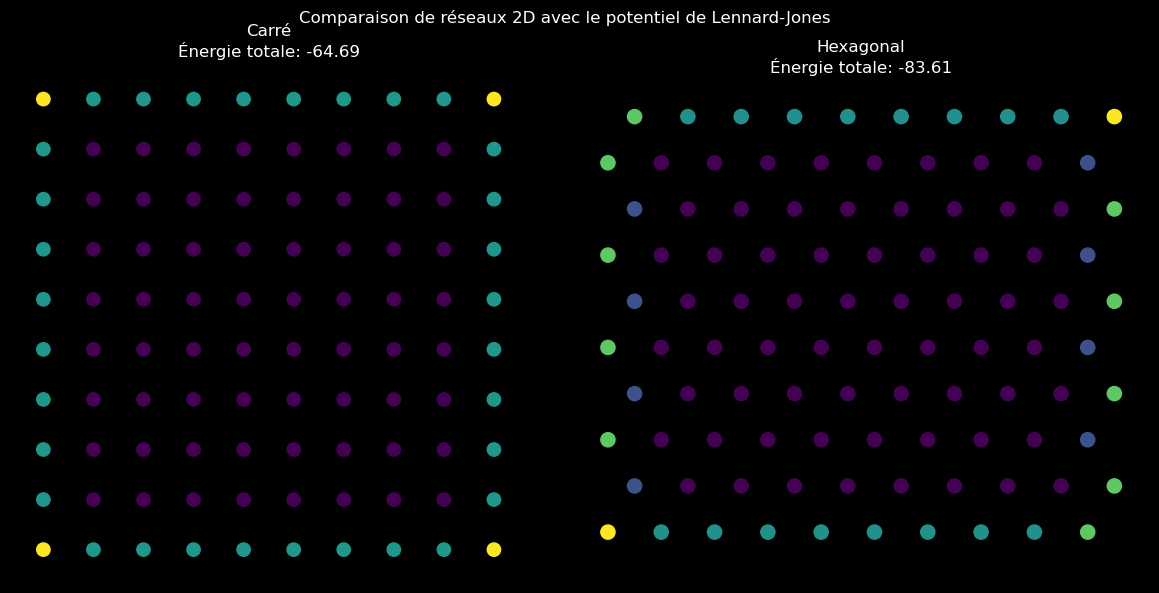

In [64]:
def draw_bonds(ax, atoms, threshold=1.3):
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            r = np.linalg.norm(atoms[i] - atoms[j])
            if r < threshold:
                ax.plot(*zip(atoms[i], atoms[j]), color='blue', linewidth=0.5)

def plot_lattice_with_bonds(ax, atoms, energies, title):
    norm = plt.Normalize(vmin=min(energies), vmax=max(energies))
    draw_bonds(ax, atoms, threshold=1.3)  # Add bonding lines
    for (x, y), e in zip(atoms, energies):
        circle = Circle((x, y), 0.2, color=plt.cm.viridis(norm(e)))
        ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.set_xlim(min(atoms[:, 0]) - 1, max(atoms[:, 0]) + 1)
    ax.set_ylim(min(atoms[:, 1]) - 1, max(atoms[:, 1]) + 1)
    ax.axis('off')
    ax.set_title(title)
    

# Visualisation des réseaux
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_lattice_with_bonds(ax1, square_atoms, square_local, f"Carré\nÉnergie totale: {square_energy:.2f}")
plot_lattice_with_bonds(ax2, hex_atoms, hex_local, f"Hexagonal\nÉnergie totale: {hex_energy:.2f}")
plt.suptitle("Comparaison de réseaux 2D avec le potentiel de Lennard-Jones")
plt.tight_layout()
plt.show()